In [78]:
import numpy as np
import pandas as pd

In [79]:
from PIL import Image
import matplotlib.patches as patches
from matplotlib import animation, rc
from IPython.display import HTML

In [125]:
# create files
# for i in range(1,10):
#     hallway = pd.read_csv('C:/Users/ralkh/Desktop/smarthome-master/data/train/0000' + str(i) + '/video_hallway.csv')
#     kitchen = pd.read_csv('C:/Users/ralkh/Desktop/smarthome-master/data/train/0000' + str(i) + '/video_kitchen.csv')
#     living_room = pd.read_csv('C:/Users/ralkh/Desktop/smarthome-master/data/train/0000' + str(i) + '/video_living_room.csv')
#     living_room['VideoLocation'] = 'living_room'
#     kitchen['VideoLocation'] = 'kitchen'
#     hallway['VideoLocation'] = 'hallway'
#     time_video_locations = pd.concat([living_room,kitchen,hallway],axis=0)
#     time_video_locations = time_video_locations.sort(columns='t')
#     time_video_locations.to_csv(path_or_buf='C:/Users/ralkh/Desktop/smarthome-master/data/train/0000' + str(i) + '/all_video.csv')

In [81]:
hallway = pd.read_csv('C:/Users/ralkh/Desktop/smarthome-master/data/train/00001/video_hallway.csv')
hallway.head()

,t,centre_2d_x,centre_2d_y,bb_2d_br_x,bb_2d_br_y,bb_2d_tl_x,bb_2d_tl_y,centre_3d_x,centre_3d_y,centre_3d_z,bb_3d_brb_x,bb_3d_brb_y,bb_3d_brb_z,bb_3d_flt_x,bb_3d_flt_y,bb_3d_flt_z
0,13.014,209.409836,175.516663,211.0,235.0,166.0,112.0,527.046875,-592.187500,3041.875000,549.374207,-1238.784912,3071.875000,63.369892,84.493126,3011.875000
1,13.045,209.297852,174.867310,211.0,235.0,162.0,114.0,525.684692,-585.074463,3040.905518,549.200806,-1238.393799,3070.905518,21.116566,63.349468,3010.905518
2,13.076,208.179108,173.239594,211.0,235.0,160.0,114.0,512.549744,-566.385193,3033.770508,547.924744,-1235.516602,3063.770508,0.000000,63.199348,3003.770508
3,13.107,206.499939,169.614319,211.0,235.0,156.0,114.0,488.357697,-521.065918,2994.960449,540.984009,-1219.865845,3024.960449,-41.588474,62.382786,2964.960449
4,13.139,205.351562,169.048737,211.0,235.0,154.0,114.0,474.565735,-513.253357,2984.073730,539.036987,-1215.475586,3014.073730,-62.153751,62.153725,2954.073730


In [82]:
kitchen = pd.read_csv('C:/Users/ralkh/Desktop/smarthome-master/data/train/00001/video_kitchen.csv')
kitchen.head()

,t,centre_2d_x,centre_2d_y,bb_2d_br_x,bb_2d_br_y,bb_2d_tl_x,bb_2d_tl_y,centre_3d_x,centre_3d_y,centre_3d_z,bb_3d_brb_x,bb_3d_brb_y,bb_3d_brb_z,bb_3d_flt_x,bb_3d_flt_y,bb_3d_flt_z
0,22.327,221.753830,177.598480,269.0,233.0,182.0,106.0,346.453125,-323.140625,1599.875000,622.981689,-645.843445,1629.875000,121.110672,77.070404,1569.875000
1,22.358,222.427856,175.268661,275.0,233.0,184.0,104.0,356.359253,-315.492096,1627.852783,668.556763,-656.929749,1657.852783,134.475281,89.650192,1597.852783
2,22.389,223.092026,170.902344,275.0,233.0,188.0,102.0,367.825134,-296.759583,1662.541382,682.545593,-670.675232,1692.541382,160.293762,103.045998,1632.541382
3,22.420,226.071838,170.461243,279.0,233.0,192.0,98.0,395.546173,-302.091644,1707.207642,724.925171,-688.374329,1737.207642,188.205124,129.390976,1677.207642
4,22.452,226.991333,170.084122,281.0,233.0,194.0,96.0,403.839905,-301.919189,1719.080322,742.146484,-693.078979,1749.080322,201.383408,142.152985,1689.080322


In [83]:
living_room = pd.read_csv('C:/Users/ralkh/Desktop/smarthome-master/data/train/00001/video_living_room.csv')
living_room.head()

,t,centre_2d_x,centre_2d_y,bb_2d_br_x,bb_2d_br_y,bb_2d_tl_x,bb_2d_tl_y,centre_3d_x,centre_3d_y,centre_3d_z,bb_3d_brb_x,bb_3d_brb_y,bb_3d_brb_z,bb_3d_flt_x,bb_3d_flt_y,bb_3d_flt_z
0,75.705,280.039154,117.408844,307.0,169.0,266.0,72.0,1017.734375,21.968750,2417.781250,1261.782349,-420.594055,2447.781250,887.554260,401.911316,2387.781250
1,75.751,286.778564,109.800583,307.0,169.0,262.0,74.0,1053.634766,84.765625,2370.007812,1237.156128,-412.385315,2400.007812,836.974121,377.458862,2340.007812
2,75.798,297.476990,117.436119,307.0,171.0,264.0,58.0,1144.165771,21.338135,2373.364746,1238.886597,-429.817719,2403.364746,854.609497,509.478729,2343.364746
3,75.830,296.249634,104.325584,307.0,171.0,264.0,38.0,1117.765625,128.589844,2339.488281,1221.423950,-423.759247,2369.488281,842.255005,664.085693,2309.488281
4,75.861,296.411377,102.132950,307.0,173.0,262.0,26.0,1112.454956,145.708405,2325.612061,1214.270996,-437.798431,2355.612061,821.094604,756.694946,2295.612061


In [84]:
living_room['VideoLocation'] = 'living_room'
kitchen['VideoLocation'] = 'kitchen'
hallway['VideoLocation'] = 'hallway'

In [85]:
living_room.head()

,t,centre_2d_x,centre_2d_y,bb_2d_br_x,bb_2d_br_y,bb_2d_tl_x,bb_2d_tl_y,centre_3d_x,centre_3d_y,centre_3d_z,bb_3d_brb_x,bb_3d_brb_y,bb_3d_brb_z,bb_3d_flt_x,bb_3d_flt_y,bb_3d_flt_z,VideoLocation
0,75.705,280.039154,117.408844,307.0,169.0,266.0,72.0,1017.734375,21.968750,2417.781250,1261.782349,-420.594055,2447.781250,887.554260,401.911316,2387.781250,living_room
1,75.751,286.778564,109.800583,307.0,169.0,262.0,74.0,1053.634766,84.765625,2370.007812,1237.156128,-412.385315,2400.007812,836.974121,377.458862,2340.007812,living_room
2,75.798,297.476990,117.436119,307.0,171.0,264.0,58.0,1144.165771,21.338135,2373.364746,1238.886597,-429.817719,2403.364746,854.609497,509.478729,2343.364746,living_room
3,75.830,296.249634,104.325584,307.0,171.0,264.0,38.0,1117.765625,128.589844,2339.488281,1221.423950,-423.759247,2369.488281,842.255005,664.085693,2309.488281,living_room
4,75.861,296.411377,102.132950,307.0,173.0,262.0,26.0,1112.454956,145.708405,2325.612061,1214.270996,-437.798431,2355.612061,821.094604,756.694946,2295.612061,living_room


In [86]:
time_video_locations = pd.concat([living_room,kitchen,hallway],axis=0)

In [87]:
time_video_locations.head()

,t,centre_2d_x,centre_2d_y,bb_2d_br_x,bb_2d_br_y,bb_2d_tl_x,bb_2d_tl_y,centre_3d_x,centre_3d_y,centre_3d_z,bb_3d_brb_x,bb_3d_brb_y,bb_3d_brb_z,bb_3d_flt_x,bb_3d_flt_y,bb_3d_flt_z,VideoLocation
0,75.705,280.039154,117.408844,307.0,169.0,266.0,72.0,1017.734375,21.968750,2417.781250,1261.782349,-420.594055,2447.781250,887.554260,401.911316,2387.781250,living_room
1,75.751,286.778564,109.800583,307.0,169.0,262.0,74.0,1053.634766,84.765625,2370.007812,1237.156128,-412.385315,2400.007812,836.974121,377.458862,2340.007812,living_room
2,75.798,297.476990,117.436119,307.0,171.0,264.0,58.0,1144.165771,21.338135,2373.364746,1238.886597,-429.817719,2403.364746,854.609497,509.478729,2343.364746,living_room
3,75.830,296.249634,104.325584,307.0,171.0,264.0,38.0,1117.765625,128.589844,2339.488281,1221.423950,-423.759247,2369.488281,842.255005,664.085693,2309.488281,living_room
4,75.861,296.411377,102.132950,307.0,173.0,262.0,26.0,1112.454956,145.708405,2325.612061,1214.270996,-437.798431,2355.612061,821.094604,756.694946,2295.612061,living_room


In [88]:
time_video_locations.isnull().sum()

t                0
centre_2d_x      0
centre_2d_y      0
bb_2d_br_x       0
bb_2d_br_y       0
bb_2d_tl_x       0
bb_2d_tl_y       0
centre_3d_x      0
centre_3d_y      0
centre_3d_z      0
bb_3d_brb_x      0
bb_3d_brb_y      0
bb_3d_brb_z      0
bb_3d_flt_x      0
bb_3d_flt_y      0
bb_3d_flt_z      0
VideoLocation    0
dtype: int64

In [89]:
time_video_locations.describe()

,t,centre_2d_x,centre_2d_y,bb_2d_br_x,bb_2d_br_y,bb_2d_tl_x,bb_2d_tl_y,centre_3d_x,centre_3d_y,centre_3d_z,bb_3d_brb_x,bb_3d_brb_y,bb_3d_brb_z,bb_3d_flt_x,bb_3d_flt_y,bb_3d_flt_z
count,24447.000000,24447.000000,24447.000000,24447.000000,24447.000000,24447.000000,24447.000000,24447.000000,24447.000000,24447.000000,24447.000000,24447.000000,24447.000000,24447.000000,24447.000000,24447.000000
mean,613.610283,167.407656,89.130378,194.547184,148.455066,140.892379,40.357426,83.994699,328.896418,2983.439764,364.028630,-285.406093,3013.439764,-184.163943,820.437605,2953.439764
std,366.685116,45.596807,25.485900,44.736844,25.699896,48.315645,26.424932,399.575003,250.383007,555.408972,406.476547,233.071392,555.408972,412.908217,277.119388,555.408972
min,13.014000,31.733673,44.935623,65.000000,121.000000,6.000000,8.000000,-1143.893433,-891.781799,871.402771,-816.059509,-1552.792847,901.402771,-1464.206177,-707.390381,841.402771
25%,320.252500,161.483070,75.661533,181.000000,135.000000,138.000000,30.000000,18.109735,303.349518,2611.965576,249.020477,-320.846725,2641.965576,-256.501434,714.824432,2581.965576
50%,583.023000,180.646133,84.103394,211.000000,137.000000,152.000000,34.000000,216.675888,376.891266,2852.771484,495.011566,-194.622086,2882.771484,-76.667175,882.566040,2822.771484
75%,865.192500,191.375999,92.306190,219.000000,147.000000,166.000000,52.000000,308.494232,462.501892,3355.491577,590.697632,-153.500389,3385.491577,68.592205,1002.773804,3325.491577
max,1810.122000,305.992432,228.242371,309.000000,235.000000,306.000000,226.000000,1395.421021,691.522644,7386.666992,1463.037598,-10.659523,7416.666992,1340.170532,1339.735840,7356.666992


In [90]:
time_video_locations.head()

,t,centre_2d_x,centre_2d_y,bb_2d_br_x,bb_2d_br_y,bb_2d_tl_x,bb_2d_tl_y,centre_3d_x,centre_3d_y,centre_3d_z,bb_3d_brb_x,bb_3d_brb_y,bb_3d_brb_z,bb_3d_flt_x,bb_3d_flt_y,bb_3d_flt_z,VideoLocation
0,75.705,280.039154,117.408844,307.0,169.0,266.0,72.0,1017.734375,21.968750,2417.781250,1261.782349,-420.594055,2447.781250,887.554260,401.911316,2387.781250,living_room
1,75.751,286.778564,109.800583,307.0,169.0,262.0,74.0,1053.634766,84.765625,2370.007812,1237.156128,-412.385315,2400.007812,836.974121,377.458862,2340.007812,living_room
2,75.798,297.476990,117.436119,307.0,171.0,264.0,58.0,1144.165771,21.338135,2373.364746,1238.886597,-429.817719,2403.364746,854.609497,509.478729,2343.364746,living_room
3,75.830,296.249634,104.325584,307.0,171.0,264.0,38.0,1117.765625,128.589844,2339.488281,1221.423950,-423.759247,2369.488281,842.255005,664.085693,2309.488281,living_room
4,75.861,296.411377,102.132950,307.0,173.0,262.0,26.0,1112.454956,145.708405,2325.612061,1214.270996,-437.798431,2355.612061,821.094604,756.694946,2295.612061,living_room


In [106]:
time_video_locations = time_video_locations.sort(columns='t')

C:\Users\ralkh\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [107]:
time_video_locations.head()

,t,centre_2d_x,centre_2d_y,bb_2d_br_x,bb_2d_br_y,bb_2d_tl_x,bb_2d_tl_y,centre_3d_x,centre_3d_y,centre_3d_z,bb_3d_brb_x,bb_3d_brb_y,bb_3d_brb_z,bb_3d_flt_x,bb_3d_flt_y,bb_3d_flt_z,VideoLocation,index
0,13.014,209.409836,175.516663,211.0,235.0,166.0,112.0,527.046875,-592.187500,3041.875000,549.374207,-1238.784912,3071.875000,63.369892,84.493126,3011.875000,hallway,1
1,13.045,209.297852,174.867310,211.0,235.0,162.0,114.0,525.684692,-585.074463,3040.905518,549.200806,-1238.393799,3070.905518,21.116566,63.349468,3010.905518,hallway,3
2,13.076,208.179108,173.239594,211.0,235.0,160.0,114.0,512.549744,-566.385193,3033.770508,547.924744,-1235.516602,3063.770508,0.000000,63.199348,3003.770508,hallway,8
3,13.107,206.499939,169.614319,211.0,235.0,156.0,114.0,488.357697,-521.065918,2994.960449,540.984009,-1219.865845,3024.960449,-41.588474,62.382786,2964.960449,hallway,10
4,13.139,205.351562,169.048737,211.0,235.0,154.0,114.0,474.565735,-513.253357,2984.073730,539.036987,-1215.475586,3014.073730,-62.153751,62.153725,2954.073730,hallway,14


In [109]:
time_video_locations['index'] = range(24447)

In [110]:
time_video_locations.head()

,t,centre_2d_x,centre_2d_y,bb_2d_br_x,bb_2d_br_y,bb_2d_tl_x,bb_2d_tl_y,centre_3d_x,centre_3d_y,centre_3d_z,bb_3d_brb_x,bb_3d_brb_y,bb_3d_brb_z,bb_3d_flt_x,bb_3d_flt_y,bb_3d_flt_z,VideoLocation,index
0,13.014,209.409836,175.516663,211.0,235.0,166.0,112.0,527.046875,-592.187500,3041.875000,549.374207,-1238.784912,3071.875000,63.369892,84.493126,3011.875000,hallway,0
1,13.045,209.297852,174.867310,211.0,235.0,162.0,114.0,525.684692,-585.074463,3040.905518,549.200806,-1238.393799,3070.905518,21.116566,63.349468,3010.905518,hallway,1
2,13.076,208.179108,173.239594,211.0,235.0,160.0,114.0,512.549744,-566.385193,3033.770508,547.924744,-1235.516602,3063.770508,0.000000,63.199348,3003.770508,hallway,2
3,13.107,206.499939,169.614319,211.0,235.0,156.0,114.0,488.357697,-521.065918,2994.960449,540.984009,-1219.865845,3024.960449,-41.588474,62.382786,2964.960449,hallway,3
4,13.139,205.351562,169.048737,211.0,235.0,154.0,114.0,474.565735,-513.253357,2984.073730,539.036987,-1215.475586,3014.073730,-62.153751,62.153725,2954.073730,hallway,4


In [111]:
time_video_locations.to_csv(path_or_buf='C:/Users/ralkh/Desktop/smarthome-master/data/train/00001/all_video.csv')

In [112]:
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb 
%matplotlib inline
rcParams['figure.figsize'] = 5, 5
sb.set_style('whitegrid')

In [113]:
import sklearn 
from sklearn.cluster import DBSCAN
from collections import Counter

In [114]:
time = time_video_locations.t
location =  time_video_locations.VideoLocation

In [115]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [116]:
%matplotlib inline
rcParams['figure.figsize'] = 30,5
sb.set_style('whitegrid')

In [117]:
from ipywidgets import *
from IPython.display import display
from bokeh.models.annotations import Label
from bokeh.plotting import figure, output_file, curdoc,show,output_notebook

In [118]:
centre_3d_x   =   time_video_locations.centre_3d_x
centre_3d_y   =   time_video_locations.centre_3d_y
centre_3d_z   =   time_video_locations.centre_3d_z

bb_3d_brb_x   =   time_video_locations.bb_3d_brb_x
bb_3d_brb_y   =   time_video_locations.bb_3d_brb_y
bb_3d_brb_z   =   time_video_locations.bb_3d_brb_z

bb_3d_flt_x   =   time_video_locations.bb_3d_flt_x
bb_3d_flt_y   =   time_video_locations.bb_3d_flt_y
bb_3d_flt_z   =   time_video_locations.bb_3d_flt_z

locations = time_video_locations.VideoLocation

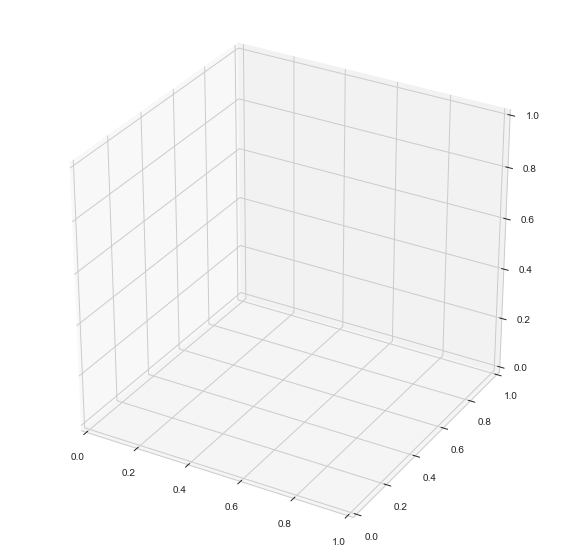

In [119]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

from itertools import product, combinations

# Rectangle()
rcParams['figure.figsize'] = 10,10
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

In [120]:
def Moves(x):
    fig = plt.figure()

    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs=centre_3d_x[x], ys=centre_3d_y[x], zs=centre_3d_z[x], c='r', marker='o')
    ax.scatter(xs=bb_3d_brb_x[x], ys=bb_3d_brb_y[x], zs=bb_3d_brb_z[x], c='b', marker='o')
    ax.scatter(xs=bb_3d_flt_x[x], ys=bb_3d_flt_y[x], zs=bb_3d_flt_z[x], c='b', marker='o')
   
    plt.show()

In [121]:
widgets.interact(Moves, x=widgets.IntSlider(min=time_video_locations.index.min(),max=time_video_locations.index.max(),step=1,value=1));